##### import relevant libraries

In [1]:
#two species
#5 from each
import pandas as pd
import warnings
from pandas.core.common import SettingWithCopyWarning
import matplotlib.pyplot as plt
import numpy as np
warnings.simplefilter(action="ignore", category=SettingWithCopyWarning)
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

##### Select measures, species, and spiders of interest

In [2]:
df = pd.read_csv("all_spider_summary.csv")
ofinterest = ["Metepeira labyrinthia", "Parasteatoda tepidariorum"]
dfi = df[df["Specie Name"].isin(ofinterest)]
dfi.drop(dfi.columns.difference(['Conditions','Specie Name','LombSc period','Spider ID', "Mean activity onset", "DiNoc ratio"]), 1, inplace=True)
dfi

,Specie Name,Spider ID,Conditions,LombSc period,Mean activity onset,DiNoc ratio
702,Metepeira labyrinthia,Monitor 6 Spider 2,LD,24.655704,20:52:00,-1.994126
703,Metepeira labyrinthia,Monitor 6 Spider 3,LD,24.220232,20:34:00,-1.999588
704,Metepeira labyrinthia,Monitor 6 Spider 4,LD,24.220232,21:23:00,-1.963426
705,Metepeira labyrinthia,Monitor 6 Spider 5,LD,24.404965,21:04:00,-1.989791
706,Metepeira labyrinthia,Monitor 6 Spider 6,LD,24.343075,21:24:00,-1.970524
...,...,...,...,...,...,...
949,Parasteatoda tepidariorum,Monitor 12 Spider 27,DD,23.806503,NaN,NaN
950,Parasteatoda tepidariorum,Monitor 12 Spider 29,DD,23.546960,NaN,NaN
951,Parasteatoda tepidariorum,Monitor 12 Spider 30,DD,21.789095,NaN,NaN
952,Parasteatoda tepidariorum,Monitor 12 Spider 31,DD,21.442977,NaN,NaN


##### add column for family

In [3]:
def family(row):  #populate Family column 
    if row["Specie Name"] == "Parasteatoda tepidariorum":
        return "Theridiidae Tangle-Web"
    if row["Specie Name"] == "Metepeira labyrinthia":
        return "Araneidae Orb-Weaver"
    
dfi['Family'] = dfi.apply (lambda row: family(row), axis=1)

##### convert minutes to hours & store in column, Ot Mean Onset

In [4]:
def converttohours():
    global dfi
    xpd = []
    for i in dfi["Mean activity onset"].values:
        if type(i) != type(dfi["Mean activity onset"].values[-1]):
            xpd.append(pd.to_datetime(i).time())
        else:
            xpd.append("nan")
    ot = []
    for i in xpd:
        if i != xpd[-1]:
            ot.append(i.hour + i.minute * (1/60))
        else:
            ot.append("nan")
    
    dfi["Ot Mean Onset"] = ot
    display(dfi)
    
converttohours()

,Specie Name,Spider ID,Conditions,LombSc period,Mean activity onset,DiNoc ratio,Family,Ot Mean Onset
702,Metepeira labyrinthia,Monitor 6 Spider 2,LD,24.655704,20:52:00,-1.994126,Araneidae Orb-Weaver,20.866667
703,Metepeira labyrinthia,Monitor 6 Spider 3,LD,24.220232,20:34:00,-1.999588,Araneidae Orb-Weaver,20.566667
704,Metepeira labyrinthia,Monitor 6 Spider 4,LD,24.220232,21:23:00,-1.963426,Araneidae Orb-Weaver,21.383333
705,Metepeira labyrinthia,Monitor 6 Spider 5,LD,24.404965,21:04:00,-1.989791,Araneidae Orb-Weaver,21.066667
706,Metepeira labyrinthia,Monitor 6 Spider 6,LD,24.343075,21:24:00,-1.970524,Araneidae Orb-Weaver,21.4
...,...,...,...,...,...,...,...,...
949,Parasteatoda tepidariorum,Monitor 12 Spider 27,DD,23.806503,NaN,NaN,Theridiidae Tangle-Web,nan
950,Parasteatoda tepidariorum,Monitor 12 Spider 29,DD,23.546960,NaN,NaN,Theridiidae Tangle-Web,nan
951,Parasteatoda tepidariorum,Monitor 12 Spider 30,DD,21.789095,NaN,NaN,Theridiidae Tangle-Web,nan
952,Parasteatoda tepidariorum,Monitor 12 Spider 31,DD,21.442977,NaN,NaN,Theridiidae Tangle-Web,nan


##### select 5 spiders from each species

In [5]:
dfpar = dfi[dfi.Family == "Theridiidae Tangle-Web"]  #tangle-web df
dfmet = dfi[dfi.Family == "Araneidae Orb-Weaver"]  #orb-weaver df

metspiders = ["Monitor 13 Spider 13", "Monitor 13 Spider 19", "Monitor 13 Spider 1", "Monitor 13 Spider 5","Monitor 13 Spider 11"]
parspiders = ["Monitor 12 Spider 23", "Monitor 12 Spider 24", "Monitor 12 Spider 2", "Monitor 12 Spider 32","Monitor 12 Spider 6"]

dfmet0 = dfmet[dfmet["Spider ID"].isin(metspiders)]  #filter spiders of interest in M.labyrinthia
dfmetfinal = dfmet0[dfmet0.Conditions.isin(["LD"])]  #select LD information only

dfpar0 = dfpar[dfpar["Spider ID"].isin(parspiders)]
dfparfinal = dfpar0[dfpar0.Conditions.isin(["LD"])] # ^ same process for P.tepidariorum

dfo = dfmetfinal.append(dfparfinal, ignore_index = True)
display(dfo)

,Specie Name,Spider ID,Conditions,LombSc period,Mean activity onset,DiNoc ratio,Family,Ot Mean Onset
0,Metepeira labyrinthia,Monitor 13 Spider 1,LD,24.038275,20:24:00,-1.985919,Araneidae Orb-Weaver,20.4
1,Metepeira labyrinthia,Monitor 13 Spider 5,LD,24.343075,20:50:00,-1.452809,Araneidae Orb-Weaver,20.833333
2,Metepeira labyrinthia,Monitor 13 Spider 11,LD,24.467171,21:05:00,-1.994111,Araneidae Orb-Weaver,21.083333
3,Metepeira labyrinthia,Monitor 13 Spider 13,LD,24.038275,20:31:00,-1.528771,Araneidae Orb-Weaver,20.516667
4,Metepeira labyrinthia,Monitor 13 Spider 19,LD,24.343075,21:28:00,-2.000270,Araneidae Orb-Weaver,21.466667
5,Parasteatoda tepidariorum,Monitor 12 Spider 2,LD,24.159275,20:38:00,-1.905349,Theridiidae Tangle-Web,20.633333
6,Parasteatoda tepidariorum,Monitor 12 Spider 6,LD,23.859031,20:26:00,-1.918989,Theridiidae Tangle-Web,20.433333
7,Parasteatoda tepidariorum,Monitor 12 Spider 23,LD,24.343075,20:41:00,-1.929509,Theridiidae Tangle-Web,20.683333
8,Parasteatoda tepidariorum,Monitor 12 Spider 24,LD,24.220232,20:16:00,-1.963449,Theridiidae Tangle-Web,20.266667
9,Parasteatoda tepidariorum,Monitor 12 Spider 32,LD,24.220232,20:08:00,-1.977708,Theridiidae Tangle-Web,20.133333


##### implement PCA calculations

In [6]:
features = ["LombSc period","DiNoc ratio", "Ot Mean Onset"]
x = dfo.loc[:, features].values
y = dfo.loc[:,['Specie Name']]
x = StandardScaler().fit_transform(x)

In [7]:
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
              , columns = ['principal component 1', 'principal component 2'])
finalDf = pd.concat([principalDf, dfo[['Specie Name']]], axis = 1)
display(finalDf)

,principal component 1,principal component 2,Specie Name
0,-1.071504,-0.701656,Metepeira labyrinthia
1,0.737341,2.207760,Metepeira labyrinthia
2,1.940907,-0.533013,Metepeira labyrinthia
3,-1.054183,1.715326,Metepeira labyrinthia
4,2.151660,-0.443142,Metepeira labyrinthia
5,-0.182492,-0.209765,Parasteatoda tepidariorum
6,-1.766111,-0.340996,Parasteatoda tepidariorum
7,0.666662,-0.321522,Parasteatoda tepidariorum
8,-0.590489,-0.628369,Parasteatoda tepidariorum
9,-0.831790,-0.744624,Parasteatoda tepidariorum


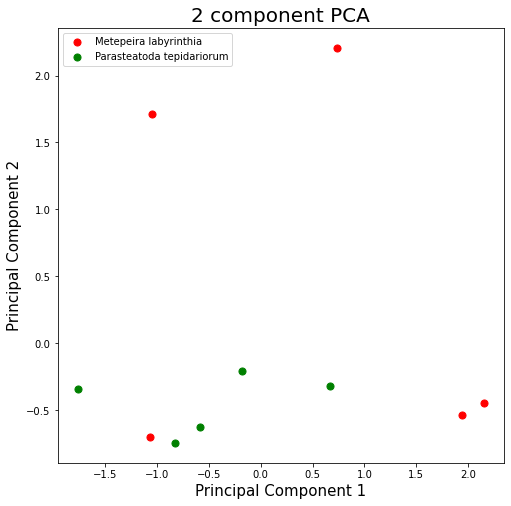

In [8]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = ['Metepeira labyrinthia', 'Parasteatoda tepidariorum']
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['Specie Name'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)

trying it without including frp

,principal component 1,principal component 2,Specie Name
0,-0.903858,-0.012203,Metepeira labyrinthia
1,1.883091,-1.178908,Metepeira labyrinthia
2,0.343264,1.295675,Metepeira labyrinthia
3,1.009405,-1.489247,Metepeira labyrinthia
4,1.037074,2.035159,Metepeira labyrinthia
5,-0.168876,0.125254,Parasteatoda tepidariorum
6,-0.593357,-0.198070,Parasteatoda tepidariorum
7,-0.164989,0.308318,Parasteatoda tepidariorum
8,-1.069804,-0.344794,Parasteatoda tepidariorum
9,-1.371949,-0.541186,Parasteatoda tepidariorum


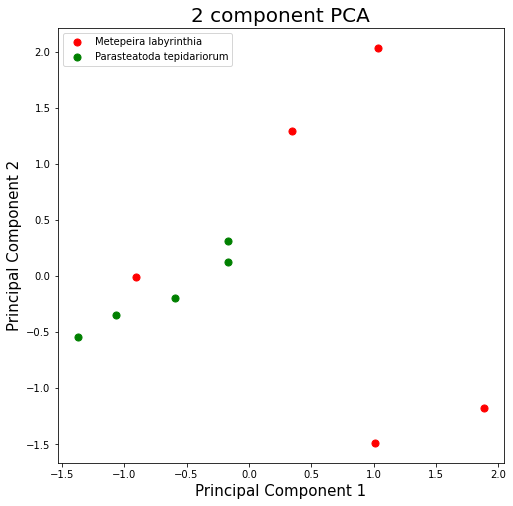

In [9]:
features = ["DiNoc ratio", "Ot Mean Onset"]
x = dfo.loc[:, features].values
y = dfo.loc[:,['Specie Name']]
x = StandardScaler().fit_transform(x)

pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
              , columns = ['principal component 1', 'principal component 2'])
finalDf = pd.concat([principalDf, dfo[['Specie Name']]], axis = 1)
display(finalDf)

fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = ['Metepeira labyrinthia', 'Parasteatoda tepidariorum']
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['Specie Name'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)